In [61]:
#Name-Neha somvanshi
#project_name- RED WINE ANALYSIS
#Batch number- DS2307


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox, zscore
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample, shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import joblib
import warnings as wr
wr.filterwarnings("ignore")

In [2]:
df=pd.read_csv("E:\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# to know the missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# features of data
columns=df.columns 
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# statistical summary
df.describe()   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Exploratort Data Analysis(EDA)

In [7]:
#checking missing values
df.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Checking outliers

All Features-Boxplot


<function matplotlib.pyplot.show(close=None, block=None)>

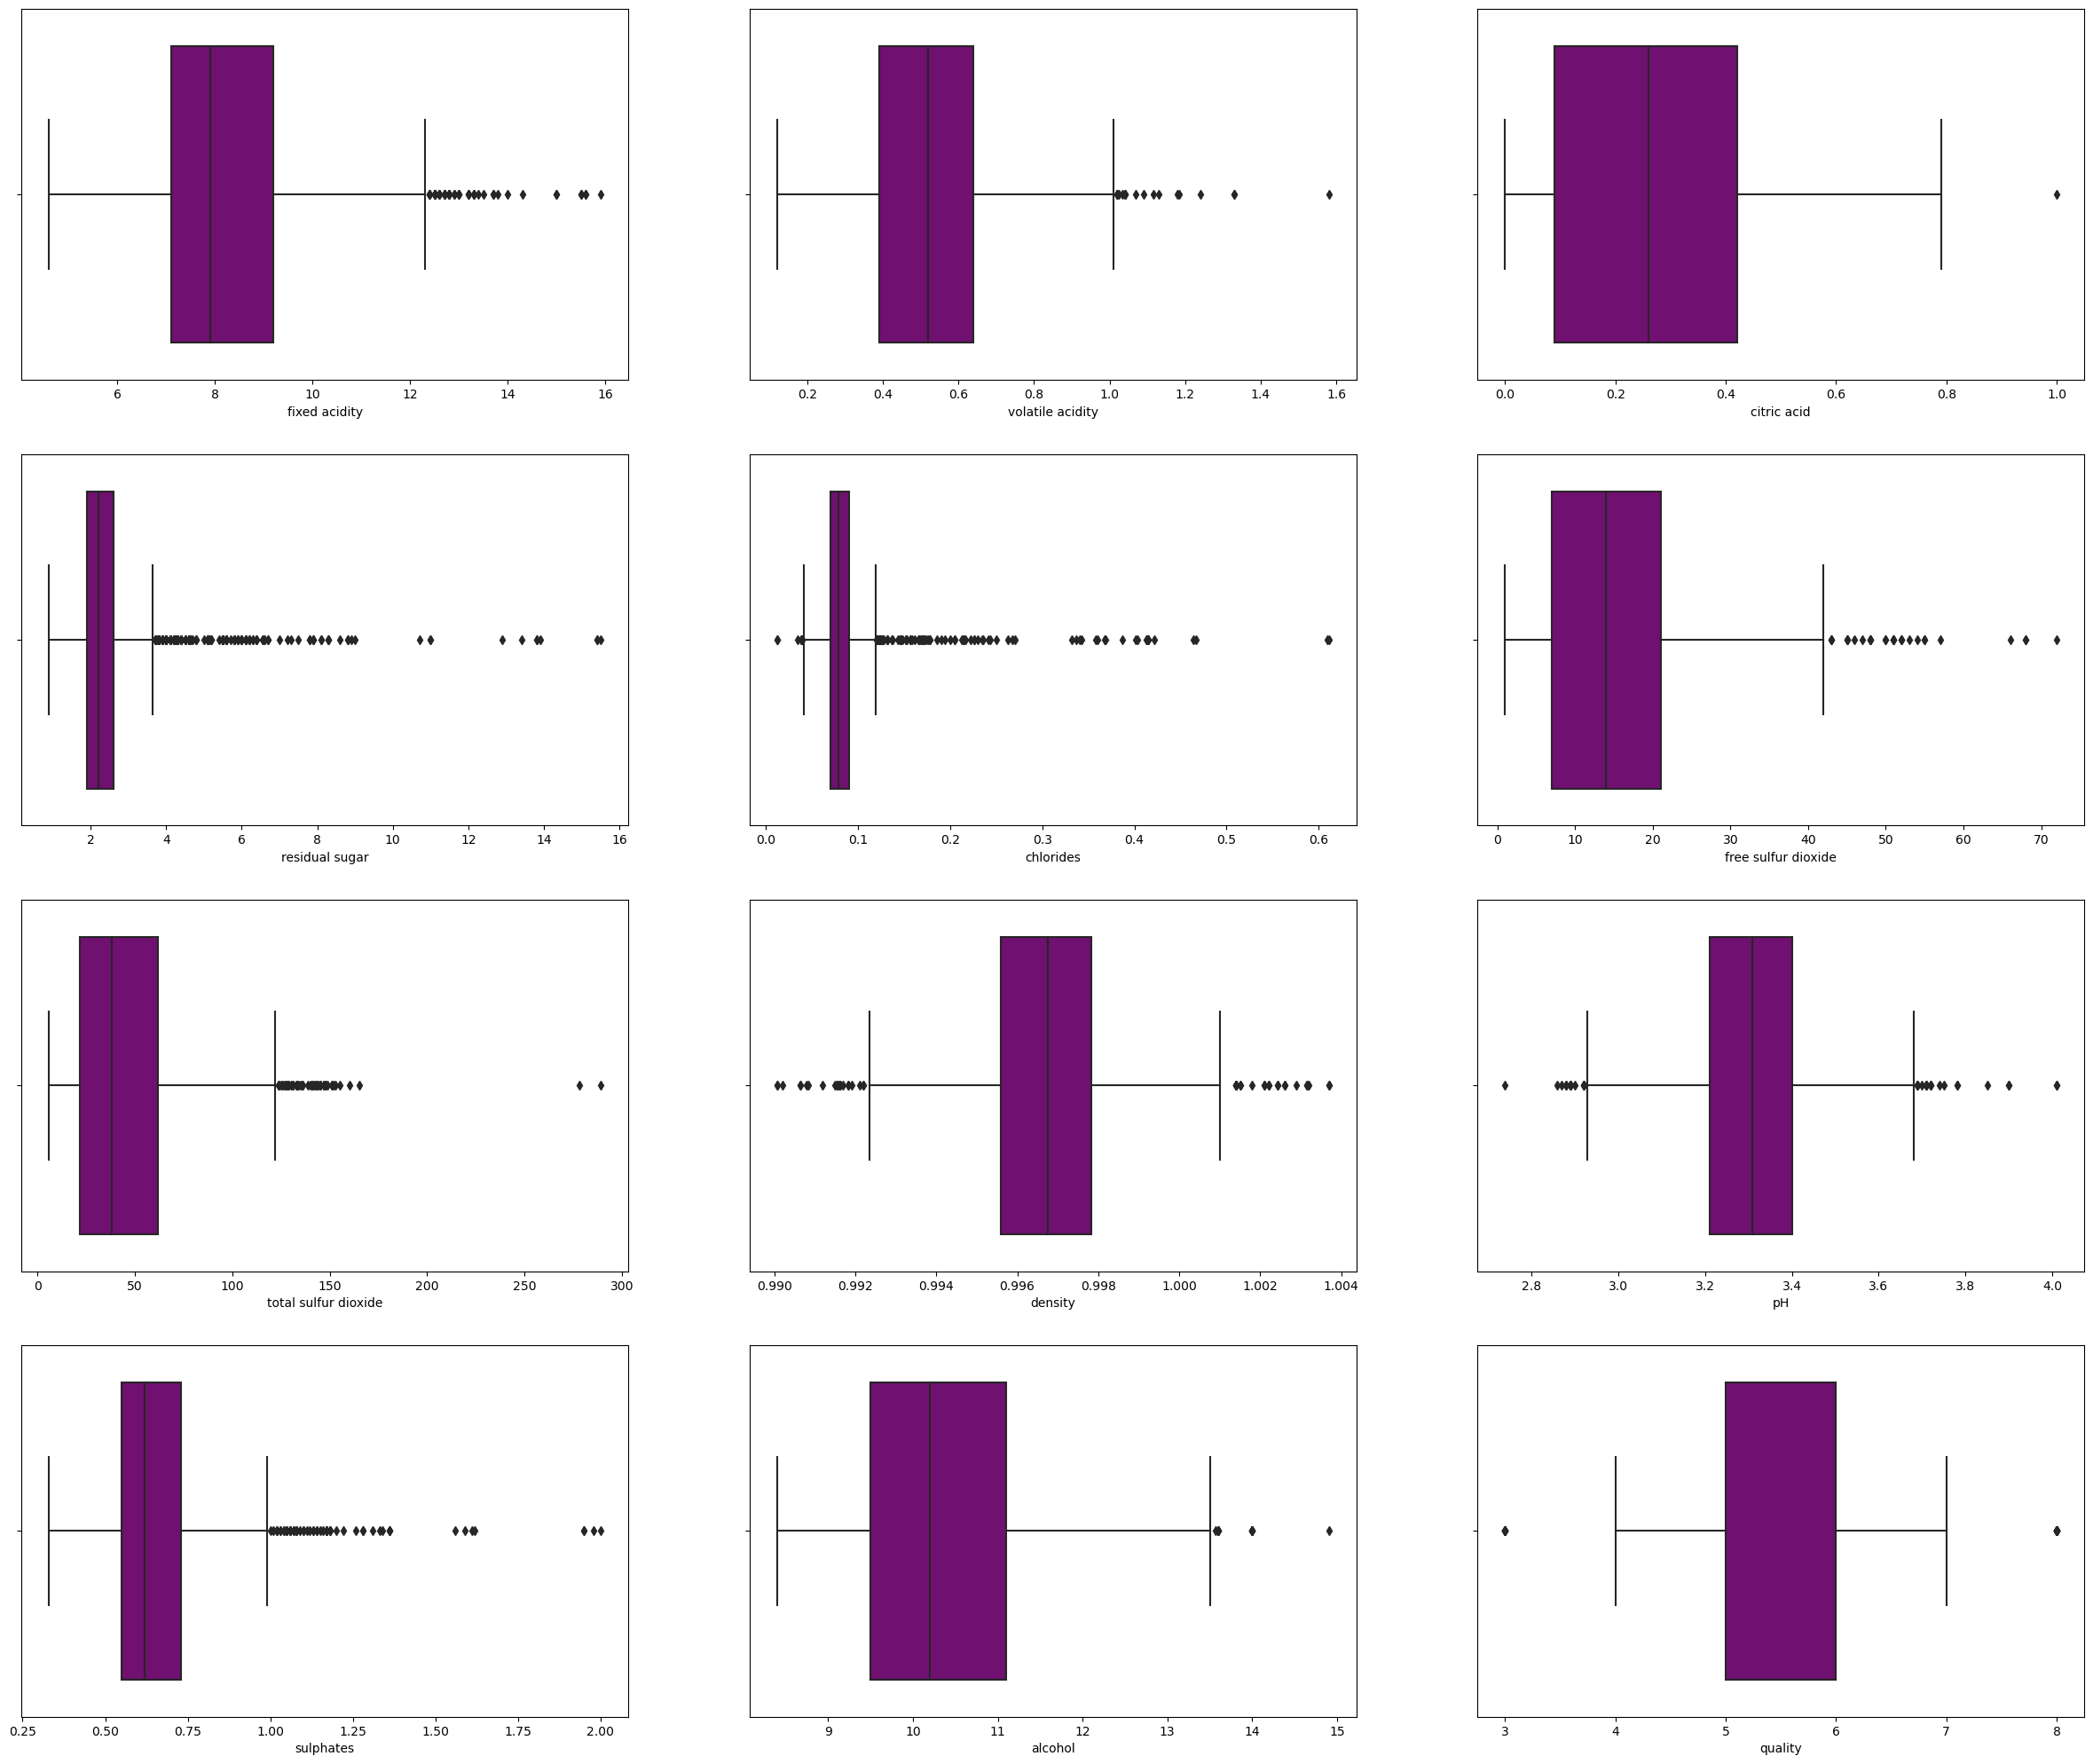

In [10]:
#Checking outliers using boxplot

plt.figure(figsize=(30,25)) 
for i in range(0, len (columns)):
    plt.subplot(4,3, i+1)
    sns.boxplot(df[columns[i]], color='purple')
print('All Features-Boxplot')
plt.show

# Removing Outliers

In [13]:
z=np.abs(zscore(df)) #using z score for removing outliers and calucating absolute zscore
df_new=df[(z<4).all(axis=1)]
df_new.shape

(1537, 12)

<AxesSubplot:xlabel='quality', ylabel='count'>

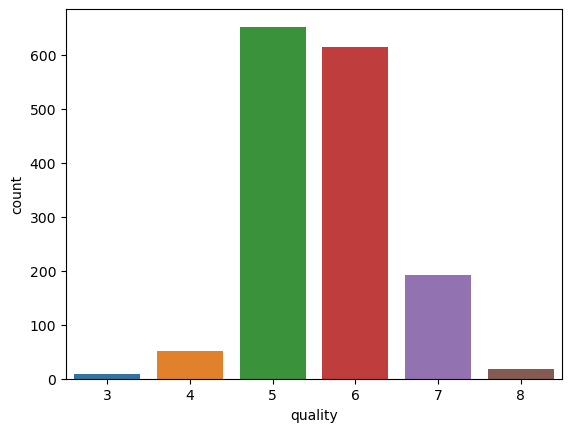

In [19]:
# visualizing the data imbalance using countplot
sns.countplot(x="quality", data= df_new) 

# Splitting the dataset

In [20]:
df["Quality"]=0
df.loc[df['quality']>7, 'Quality']=1
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [57]:
#check unique target variables and dropping the target class
df["Quality"].value_counts() 
df.drop('Quality', axis=1, inplace=True)

# Oversampling

In [22]:
#splitting into independent and dependent 
x = df[df['Quality']==0]
y = df[df['Quality']==1]

#data balancing
upsampled = resample(y, replace=True, n_samples=x.shape[0])
df_new = pd.concat([x, upsampled])
df_new =shuffle(df_new)

<AxesSubplot:xlabel='Quality', ylabel='count'>

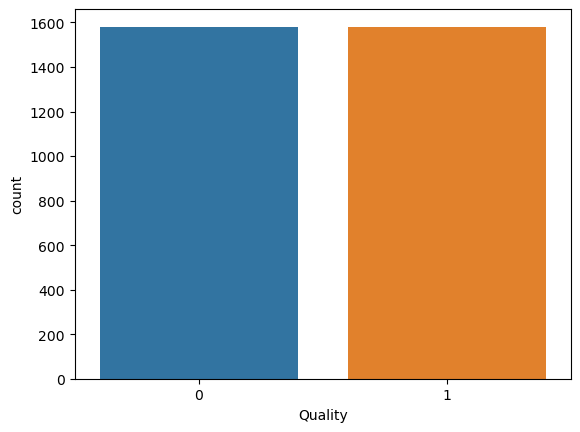

In [23]:
# To visualize the xlabel and ylabel by countplot
sns.countplot(df_new["Quality"])

# Train test split

In [24]:
# scaling by using train test split 
X = df_new.drop('Quality', axis=1) 
y= df_new ['Quality']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [25]:
#StandardScaler
ss =StandardScaler()
X_train =ss.fit_transform(X_train.values)
X_test=ss.fit_transform(X_test.values)
X_train=pd.DataFrame(X_train, columns= X.columns)
X_test=pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.523702,0.069064,-1.464842,-0.553847,-0.950736,1.215330,1.541428,-2.281048,1.153261,0.721386,1.974186
1,-0.792469,-0.449907,-0.428594,-0.022669,0.138914,1.399688,0.144663,-0.018602,-0.170334,-0.848765,-0.897316
2,-0.374621,2.635086,0.508963,-0.250316,1.005046,0.662256,2.439348,0.469376,-0.225484,0.132579,-1.471617
3,-0.009005,0.818688,-1.020736,-0.553847,-0.168423,2.137120,0.177919,-0.400113,0.491463,1.179347,0.394860
4,-0.844700,-0.680561,-0.033833,-0.553847,-0.308122,-0.996965,-1.085820,-1.393815,0.381164,-1.045034,1.112736


In [26]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.857579,-0.522095,-1.680476,-0.749656,-0.853032,1.037078,0.720665,-2.474489,2.340901,0.268543,1.976289
1,0.801506,0.615442,-0.527179,-0.294251,0.026489,0.390991,0.650667,1.432722,-0.605004,-1.030118,-0.825402
2,0.216508,0.994620,-0.828039,0.920163,2.778540,3.436830,3.695607,1.196208,-0.718308,1.157101,-1.471946
3,1.173778,-0.711684,0.926979,0.009353,-0.228856,-0.901183,-0.819305,0.533969,-0.774960,-0.414962,-0.178858
4,0.056962,-0.269309,0.224972,-0.597854,-0.285599,-0.808885,-0.959302,-0.431008,0.358080,-0.141560,0.324010


In [27]:
from xgboost import XGBClassifier

# Building model

In [28]:
key = ['KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'XGBClassifier', 'SVC']
value = [KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), DecisionTreeClassifier(), XGBClassifier(), SVC()]

models = dict(zip(key,value))

# Model Selection

In [29]:
training_scores=[]
testing_scores=[]

for key, value in models.items():
    value.fit(X_train, y_train)
    train_score=value.score(X_train, y_train)
    test_score=value.score(X_test, y_test)
    training_scores.append(train_score)
    training_scores.append(test_score)
    
    print(f'{key}\n')
    print(f"Training Score: {train_score}")
    print(f"Testing_score: {test_score}\n")

KNeighborsClassifier

Training Score: 0.9920917358639778
Testing_score: 0.985781990521327

RandomForestClassifier

Training Score: 1.0
Testing_score: 0.9273301737756714

GaussianNB

Training Score: 0.8497429814155792
Testing_score: 0.8467614533965245

DecisionTreeClassifier

Training Score: 1.0
Testing_score: 0.8278041074249605

XGBClassifier

Training Score: 1.0
Testing_score: 0.9304897314375987

SVC

Training Score: 0.9770660340055358
Testing_score: 0.9778830963665087



# Cross Validation

In [30]:
cv_scores =[]
for key, value in models.items():
    cvs=cross_val_score(value, X,y, cv=5)
    
    cv_scores.append(cvs.mean())
    print(f'{key}\n')
    print(f"CV Score: {cvs.mean()} \n")

KNeighborsClassifier

CV Score: 0.9826039354490371 

RandomForestClassifier

CV Score: 1.0 

GaussianNB

CV Score: 0.8209925610414542 

DecisionTreeClassifier

CV Score: 0.9946232527446156 

XGBClassifier

CV Score: 0.9981027656128141 

SVC

CV Score: 0.7805207270982063 



# Hyperparameter Tuning

In [32]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
pred=rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9273301737756714
[[308   1]
 [ 45 279]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       309
           1       1.00      0.86      0.92       324

    accuracy                           0.93       633
   macro avg       0.93      0.93      0.93       633
weighted avg       0.94      0.93      0.93       633



In [33]:
params = {'n_estimators': [10,100,200],
'max_depth': [10,50,100,150],
    'min_weight_fraction_leaf':[0,0.1,0.01],
        'ccp_alpha':[0,0.01,0.1]}
grid=GridSearchCV(rfc, param_grid=params, cv =5, verbose=1)

In [34]:
grid.fit(X,y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0, 0.01, 0.1],
                         'max_depth': [10, 50, 100, 150],
                         'min_weight_fraction_leaf': [0, 0.1, 0.01],
                         'n_estimators': [10, 100, 200]},
             verbose=1)

In [35]:
grid.best_params_

{'ccp_alpha': 0,
 'max_depth': 50,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 10}

# Model Evaluation

In [36]:
#evaluation of random forest classifier
best=grid.best_estimator_
best.fit(X_train, y_train)
pred=best.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9273301737756714
[[307   2]
 [ 44 280]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       309
           1       0.99      0.86      0.92       324

    accuracy                           0.93       633
   macro avg       0.93      0.93      0.93       633
weighted avg       0.94      0.93      0.93       633



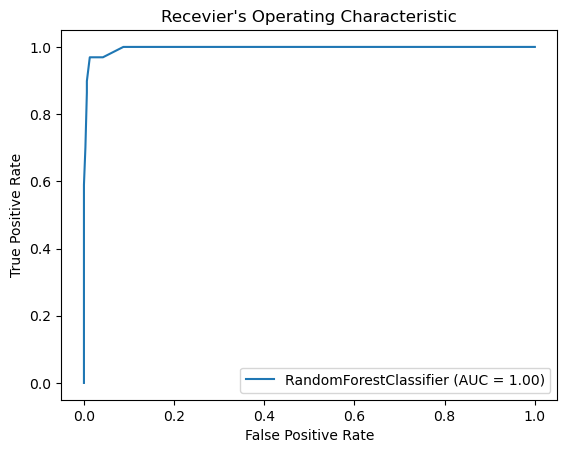

In [37]:
#AUC-ROC Curve
plot_roc_curve(best, X_test, y_test)
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [60]:
# model saving
joblib.dump(best, "Red_Wine_Quality_Prediction_model.pkl")  #saving model as a pickle

['Red_Wine_Quality_Prediction_model.pkl']

# Outcome

In [39]:
a=np.array(y_test)
predicted=np.array(best.predict(X_test))
df_com=pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a))) #creating data frame 
df_com

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,0
...,...,...
628,1,1
629,1,1
630,1,1
631,1,1


In [45]:
#Save data loading
mod=joblib.load('Red_Wine_Quality_Prediction_model.pkl')